In [2]:
pip install numpy matplotlib cartopy

  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)
  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl (7.8 MB)
     --------------------------------------- 10.9/10.9 MB 36.4 MB/s eta 0:00:00
  Using cached fonttools-4.56.0-cp39-cp39-win_amd64.whl (2.2 MB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl (55 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
  Using cached pillow-11.1.0-cp39-cp39-win_amd64.whl (2.6 MB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl (211 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ---------------------------------------- 6.1/6.1 MB 48.6 MB/s eta 0:00:00
     ---------------------------------------- 46.5/46.5 KB ? eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 46.2 MB/s eta 0:00:00
  Using cached certifi-2025.1.31-py3-none-any.whl (166 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\khg95\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


육지 마스크 크기: (810, 710)


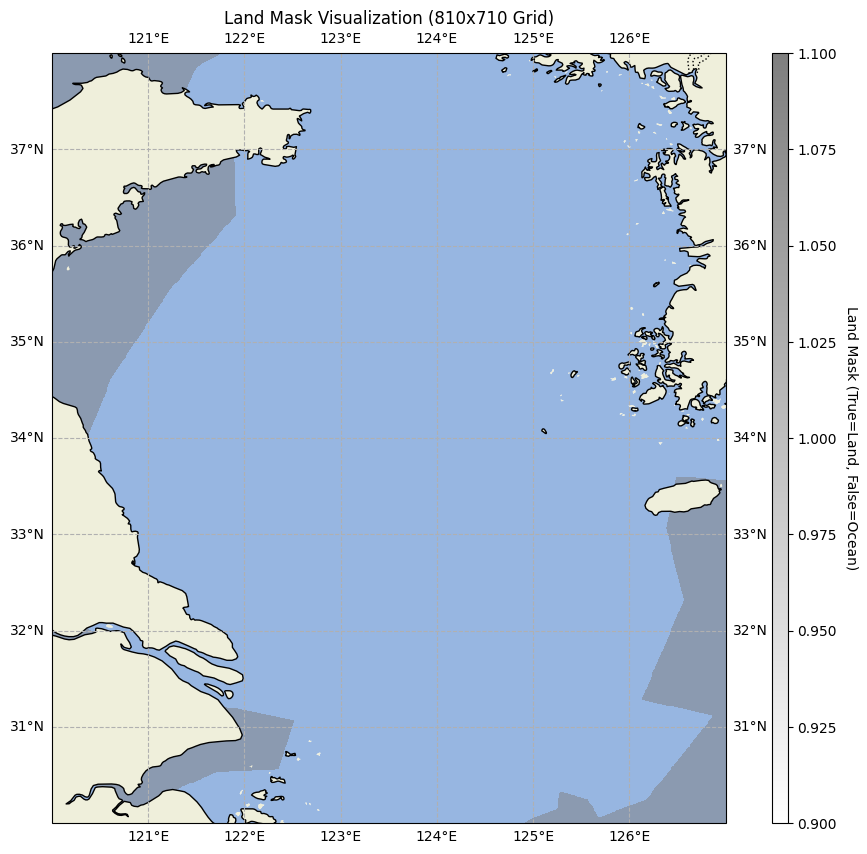

육지 마스크의 고유 값: [False  True]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 설정
GRID_SIZE = (810, 710)
LAT_RANGE = (30.0, 38.0)  # 위도 범위
LON_RANGE = (120.0, 127.0)  # 경도 범위
LAND_MASK_PATH = r"C:\baramproject\tidal_database\land_mask_810x710.npy"

# 육지 마스크 로드 및 크기 검증
land_mask = np.load(LAND_MASK_PATH)
print(f"육지 마스크 크기: {land_mask.shape}")  # 크기 확인 (810, 710인지)

# 크기 검증
if land_mask.shape != GRID_SIZE:
    raise ValueError(f"육지 마스크 크기가 {GRID_SIZE}와 일치하지 않습니다. 현재 크기: {land_mask.shape}")

# 위도와 경도 격자 생성
lat_grid = np.linspace(LAT_RANGE[0], LAT_RANGE[1], GRID_SIZE[0])
lon_grid = np.linspace(LON_RANGE[0], LON_RANGE[1], GRID_SIZE[1])
lon_mesh, lat_mesh = np.meshgrid(lon_grid, lat_grid)

# 지도 설정
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([LON_RANGE[0], LON_RANGE[1], LAT_RANGE[0], LAT_RANGE[1]], crs=ccrs.PlateCarree())

# 지도 특징 추가
ax.add_feature(cfeature.LAND, zorder=1)
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.COASTLINE, zorder=2)
ax.add_feature(cfeature.BORDERS, linestyle=':', zorder=3)

# 육지 마스크 시각화
# True(육지)는 검은색, False(해양)는 흰색으로 표시
masked_data = np.ma.masked_where(~land_mask, land_mask)  # True(육지)만 표시
cmap = plt.cm.binary  # 검은색(육지)과 흰색(해양)
im = ax.imshow(masked_data, extent=[LON_RANGE[0], LON_RANGE[1], LAT_RANGE[0], LAT_RANGE[1]], 
               cmap=cmap, alpha=0.5, transform=ccrs.PlateCarree())

# 색상 바 추가 (옵션, 육지/해양 구분 용이)
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05, aspect=50)
cbar.set_label('Land Mask (True=Land, False=Ocean)', rotation=270, labelpad=15)

# 제목 추가
plt.title('Land Mask Visualization (810x710 Grid)')

# 격자 라인 추가 (선택적, 더 자세히 확인 가능)
ax.gridlines(draw_labels=True, linestyle='--')

# 시각화 표시
plt.show()

# 데이터 값 추가 검증
unique_values = np.unique(land_mask)
print(f"육지 마스크의 고유 값: {unique_values}")
if not np.all(np.isin(unique_values, [True, False])):
    print("경고: 육지 마스크에 True/False 외의 값이 포함되어 있습니다.")